# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.



Imports and set magics:

In [1]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import your own code
import inauguralproject as ip

# Question 1

**Explain how you solve the model**

In [2]:
# code for solving the model (remember documentation and comments)
#Det her kode var der inden – jeg ved ikke helt om det skal bruges eller ej
#a = np.array([1,2,3])
#b = ip.square(a)
#print(b)

Hm = np.linspace(0,24,49)
Hf = np.linspace(0,24,49)
Lm = np.linspace(0,24,49)
Lf = np.linspace(0,24,49)

print(Hm)

[ 0.   0.5  1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5  6.   6.5
  7.   7.5  8.   8.5  9.   9.5 10.  10.5 11.  11.5 12.  12.5 13.  13.5
 14.  14.5 15.  15.5 16.  16.5 17.  17.5 18.  18.5 19.  19.5 20.  20.5
 21.  21.5 22.  22.5 23.  23.5 24. ]


In [4]:
#tror ikke det er kode skal bruges – det men det er det her de beder om at gøre...
N = 49 # number of elements
x_max = 24 # maximum value

x_vec = np.linspace(0,x_max,N)

# b. Create meshgrids similar to x1_values and x2_values above
Hf_mesh,Hm_mesh = np.meshgrid(x_vec,x_vec,indexing='ij')

#print('Dimension of grid over x1 (same as x2): ', Hf_mesh.shape) # Note that the grid is 2d. u_func needs 2d to calculate element by element. 
#commented out because it is not needed

frac_values_mesh = np.divide(Hf_mesh, Hm_mesh) # element by element division in meshgrid


/var/folders/zn/8wl2ftxd7sg0pjvzvx59s5xr0000gn/T/ipykernel_4694/380004730.py:13: RuntimeWarning: divide by zero encountered in divide
  frac_values_mesh = np.divide(Hf_mesh, Hm_mesh) # element by element division in meshgrid
/var/folders/zn/8wl2ftxd7sg0pjvzvx59s5xr0000gn/T/ipykernel_4694/380004730.py:13: RuntimeWarning: invalid value encountered in divide
  frac_values_mesh = np.divide(Hf_mesh, Hm_mesh) # element by element division in meshgrid


/Users/vg/opt/anaconda3/lib/python3.9/site-packages/numpy/core/numeric.py:1665: RuntimeWarning: invalid value encountered in multiply
  multiply(a1, b2, out=cp0)
/Users/vg/opt/anaconda3/lib/python3.9/site-packages/numpy/core/numeric.py:1666: RuntimeWarning: invalid value encountered in multiply
  tmp = array(a2 * b1)


<bound method Figure.tight_layout of <Figure size 640x480 with 1 Axes>>

/Users/vg/opt/anaconda3/lib/python3.9/site-packages/mpl_toolkits/mplot3d/proj3d.py:180: RuntimeWarning: invalid value encountered in divide
  txs, tys, tzs = vecw[0]/w, vecw[1]/w, vecw[2]/w


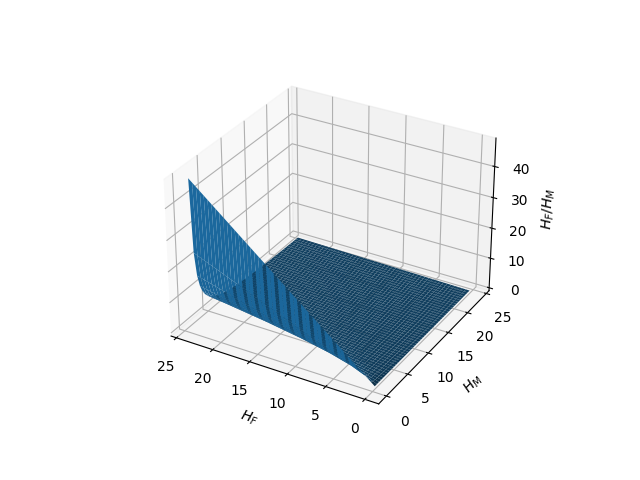

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

In [ ]:
%matplotlib widget
fig = plt.figure() #create a figure
ax = fig.add_subplot(1,1,1,projection='3d') #add a subplot to the figure
ax.plot_surface(Hf_mesh,Hm_mesh,frac_values_mesh) #plot the surface
ax.set_xlabel('$H_F$') #label the axes
ax.set_ylabel('$H_M$')
ax.set_zlabel('$H_F/H_M$')
ax.invert_xaxis() #invert the x-axis
fig.tight_layout



# Question 2

Explain your code and procedure

In [3]:
# code

# Question 3

Explain your code and procedure

In [4]:
# code

ADD CONCISE CONLUSION.